# Simple classification, regression, and regularization

## Classification

Start by importing iris data.


In [42]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import seaborn as sns
plt.style.use("ggplot")

iris = datasets.load_iris()
type(iris)
print(iris.keys())
type(iris.target)
iris.data.shape
iris.target_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Now I'm going to assign target as y variable and data as features or x variables.

In [44]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

Generating plots using scatter_matrix in pandas. Colors are determined by the target variable:

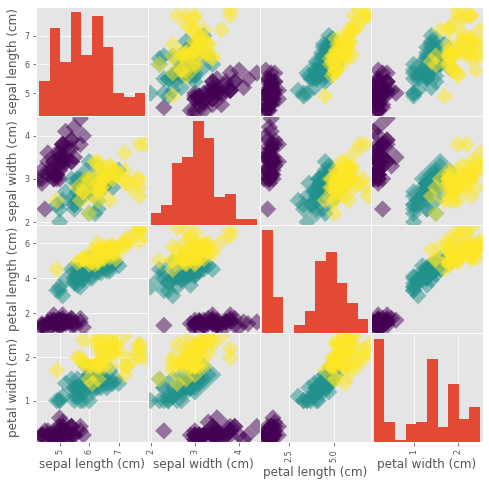

In [3]:
fig1 = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s = 150, marker = 'D')

In **sklearn**, we use *.fit()* method to fit a model to the data and *.predict()* to predict the label of a new unlabeled data point.

The following codes are using the **KNN** algorithm to classify the *iris* datasets. One of the hyperparameters of *knn* is the number of neighbors used to predict the label. This can be provided to the classifier.

In [45]:
knn = KNeighborsClassifier(n_neighbors = 6)

Now we can use the classifier on the iris data to fit the model on the training data.

In [46]:
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

The first argument is the features as a numpy array (or pandas dataframe), only continuous variables without any missing values. The target should be a numpy arrary or pandas datframe and no missing values.

Now to make predictions, we need to pass new features values in the form of array or dataframe and use *.predict()* method.

In [47]:
x_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
knn.predict(x_new)

array([1, 1, 0])

In order to measure the accuracy of our classifier, we calculate the number of correct predictions divided by the number of data points. To do so, we need to divide the data inot train and test sets. Train the data for the trains set and find the accuracy from the test set. In **sklearn** this can be done by the following:

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21, stratify = y)

**Note**: *test_size* gives the proportion of test data size, *random_state* is seeting the seed, and *stratify* specify the column for stratification (important when the number of observations for each label is different from each other).
For purpose of practice, I'm using different number of neighbors this time.

In [49]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("predictions:", y_pred)
knn.score(x_test, y_test)

predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9555555555555556

In **KNN**, increasing the number of neighbors increases the smoothness (less complicated model) while having smaller number of neighbors will make the model more complicated but probably overfit (increase the standard error or variance of our model).

Let's compare the accuracies based on the number of neighbors:

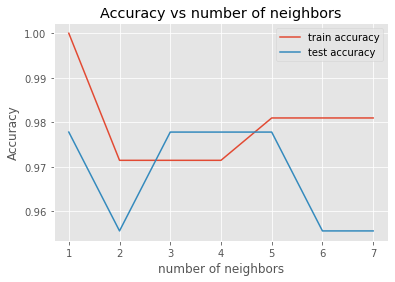

In [9]:
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.title("Accuracy vs number of neighbors")
plt.plot(neighbors, train_accuracy, label = "train accuracy")
plt.plot(neighbors, test_accuracy, label = "test accuracy")
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("Accuracy")
plt.show()

| | Predicted: 1 | Predicted: 0 |
| -:| -:|-: |
| Actual: 1 | True pos | False neg |
| Actual: 0 | False pos | True neg |

Now, $Acc = \frac{tp+tn}{tp+tn+fp+fn}$, $precission = \frac{tp}{tp+fp}$, $sensitivity= \frac{tp}{tp+fn}$, $F1score = 2\times \frac{prec. \times sens.}{prec. + sens.}$.

To find the confusion matrix, we use *confusion_matrix* and *classification_report* from *metrics*.

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Regression

In [10]:
boston = datasets.load_boston()
print(boston.keys())
print(boston.feature_names)
x = boston.data
y = boston.target
type(x)
type(y)
x_rooms = x[:, 5]
type(x_rooms)
x_rooms = x_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)
x_rooms.shape

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 1)

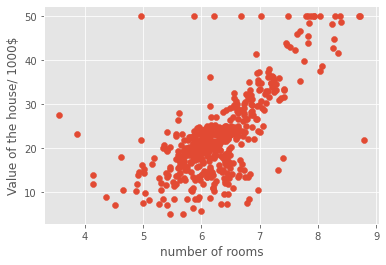

In [11]:
plt.scatter(x_rooms, y)
plt.xlabel("number of rooms")
plt.ylabel("Value of the house/ 1000$")
plt.show()

Similar to classifier, we use *LinearRegression* function this time. Now in order to make prediction, since we are not going to extrapolate outside the range of values for x, we can use *linspace()* method to get evenly spaced sample from the *min* of number of rooms vale to the *max*.

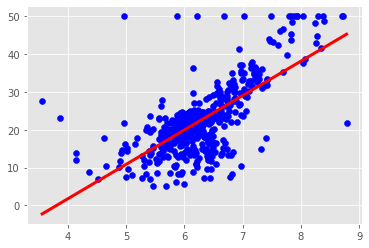

In [12]:
reg = LinearRegression()
reg.fit(x_rooms, y)
pred_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1, 1)
y_pred = reg.predict(pred_space)
plt.scatter(x_rooms, y, color = 'blue')
plt.plot(pred_space, y_pred, color = "red", linewidth = 3)
plt.show()

To check the heatmap of correlation, let's creat a correlation heatmap using seaborn plots.

In [20]:
df = np.concatenate((x, y), axis = 1)
boston.feature_names.shape
column_names = np.concatenate((boston.feature_names, np.array("response").reshape(1,)), axis = 0)

(506, 14)

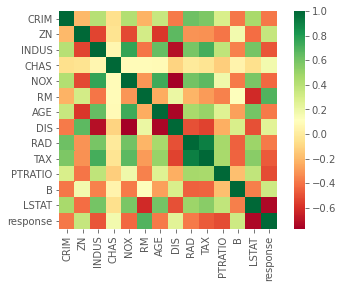

In [21]:
df = pd.DataFrame(df, columns = column_names)
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Now let's work with all the features in the dataset. We start by dividing the data into train and test sets:

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
reg_all_x = LinearRegression()
reg_all_x.fit(x_train, y_train)
y_pred = reg_all_x.predict(x_test)

The *score* method here gives us the $R^2$:

In [16]:
reg_all_x.score(x_test, y_test)

0.711226005748496

To calculate Root Mean Squared Error (RMSE), we can use the *mean_squared_error* function in *sklearn.metrics*.

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.638689926172797

To do a 5-fold cross validation, we can use *cross_val_score* from *sklearn.model_selection*.

In [24]:
cv_results = cross_val_score(reg_all_x, x, y, cv = 5)
print(cv_results)
print("Average CV scores: {}".format(np.mean(cv_results)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average CV scores: 0.3532759243958772


Note the negative value of $R^2$!

## Ridge Regression

To do ridge regression, we use *Ridge* from *linrear_model* in *sklearn*.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
ridge_reg = Ridge(alpha = 0.1, normalize = True)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
ridge_reg.score(x_test, y_test)

0.6996938275127316

## Lasso Regression
To do lasso regression, we use *Lasso* from *linrear_model* in *sklearn*.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
lasso_reg = Lasso(alpha = 0.1, normalize = True)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
lasso_reg.score(x_test, y_test)

0.5950229535328551

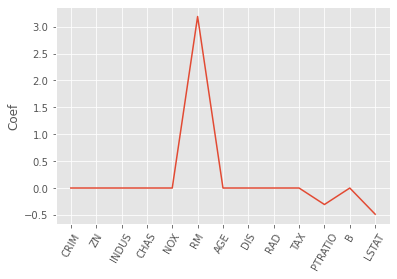

In [36]:
lasso_coef = lasso_reg.fit(x_train, y_train).coef_
names_x = boston.feature_names
plot_lasso = plt.plot(range(len(names_x)), lasso_coef)
plot_lasso = plt.xticks(range(len(names_x)), names_x, rotation = 60)
plot_lasso = plt.ylabel('Coef')
plt.show()

Just for practice, let's try doing cross validation on different values of penalty multiplier:

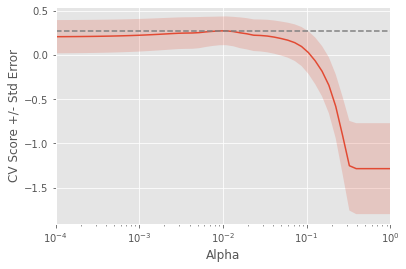

In [40]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
lasso_reg = Lasso(normalize = True)
alpha_space = np.logspace(-4, 0, 50)
lasso_score_mean = []
lasso_score_std = []

for alpha in alpha_space:
    lasso_reg.alpha = alpha
    lasso_cv_score = cross_val_score(lasso_reg, x, y, cv = 10)
    lasso_score_mean.append(np.mean(lasso_cv_score))
    lasso_score_std.append(np.std(lasso_cv_score))
    
display_plot(lasso_score_mean, lasso_score_std)